## Observations and Insights 

* All Drug Regimen have used same number of mice for research, which is 25, except "Stelasyn" which has 24.
* Ketapril has highest varianve in Tumor Volume and Romicane has lowest variance in Tumor Volume
* Complete research has been equally distributed for male and female mice
* There was statistically only 1 outlier in Infubinol Regimen, for the analysis done on Capomulin, Ramicane, Infubinol, and Ceftamin
* There is a positive correlation between the Mouse Weight and the Tumor Volume.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

print(mouse_metadata.count)
print(study_results.count)

# Combine the data into a single dataset
research_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
research_data_df.head()

<bound method DataFrame.count of     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]>
<bound method DataFrame.count of      Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of unique mice in combined dataframe.
mice_count = research_data_df["Mouse ID"].nunique()
print(f"Total Mice Count: {mice_count}")

Total Mice Count: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_data_df = research_data_df[research_data_df.duplicated(["Mouse ID","Timepoint"], keep=False)]

# Display duplicate Mouse ID and Timepoint data
duplicate_data_df[["Mouse ID","Timepoint"]]

,Mouse ID,Timepoint
908,g989,0
909,g989,0
910,g989,5
911,g989,5
912,g989,10
913,g989,10
914,g989,15
915,g989,15
916,g989,20
917,g989,20


In [4]:
# Displaying all data for Duplicate Mouse ID. 
duplicate_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Creating a clean DataFrame by dropping the duplicate mouse by its ID and Timepoint.
clean_data_df = research_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Displaying cleanded data preview
clean_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count = clean_data_df["Mouse ID"].nunique()
print(f"Total Mice Count after clean up: {mice_count}")

Total Mice Count after clean up: 249


## Summary Statistics

In [7]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Calculating mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen. 
research_summary_mean = research_data_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"].to_frame(name="Mean")
research_summary_median = research_data_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"].to_frame(name="Median")
research_summary_var = research_data_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"].to_frame(name="Variance")
research_summary_std = research_data_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"].to_frame(name="Standard Deviation")
research_summary_sem = research_data_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"].to_frame(name="SEM")

# Combining the results into a single summary dataframe.
research_summary = pd.concat([research_summary_mean,
                              research_summary_median,
                              research_summary_var,
                              research_summary_std,
                              research_summary_sem], 
                             axis=1)

# Displaying the summary statistics
research_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, producing the same summary statistics in a single line
research_summary_df = research_data_df[["Drug Regimen","Tumor Volume (mm3)"]] \
                    .groupby("Drug Regimen") \
                    .agg({"Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]})

# Displaying the summary statistics
research_summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

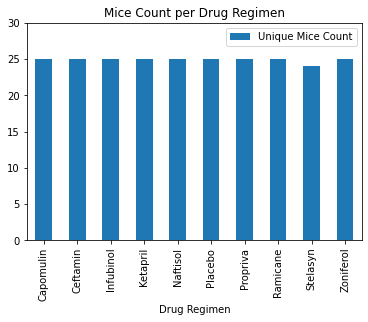

In [9]:
# Plotting a bar chart showing the total number of unique mice tested on each drug regimen using pandas.
drug_regimen_df = research_data_df.groupby(["Drug Regimen"]).nunique()["Mouse ID"] \
                                .to_frame(name="Unique Mice Count")
drug_regimen_bar = drug_regimen_df.plot(kind="bar", y="Unique Mice Count", title="Mice Count per Drug Regimen" \
                                       ,ylim=(0,30))

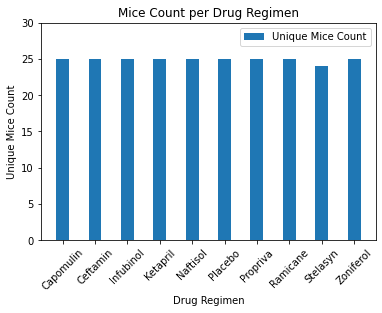

In [10]:
# Plotting a bar chart showing the total number of unique mice tested on each drug regimen using pyplot.
plt.bar(drug_regimen_df.index,drug_regimen_df["Unique Mice Count"], label="Unique Mice Count", width=.40)

# Setting Chart display properties for better representation
plt.title("Mice Count per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Unique Mice Count")
plt.xticks(rotation=45)
plt.ylim([0,30])
plt.legend()
plt.show()

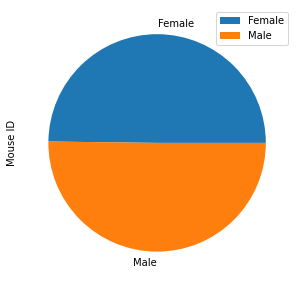

In [11]:
# Plotting a pie chart showing the distribution of female versus male mice using pandas
mice_df = research_data_df.groupby(["Sex"]).nunique()["Mouse ID"].to_frame()
mice_pie_p = mice_df.plot(kind="pie", y="Mouse ID", figsize=(5,5))

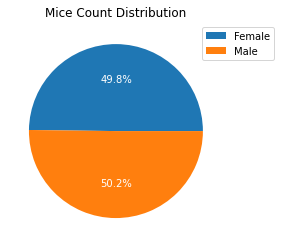

In [12]:
# Plotting a pie chart showing the distribution of female versus male mice using pyplot
labels = mice_df.index
mice_data = mice_df["Mouse ID"]
fig1, axs1 = plt.subplots()
axs1.pie(mice_data, labels=labels, autopct="%1.1f%%", textprops=dict(color="w"))
axs1.set_title("Mice Count Distribution")
axs1.legend(loc="upper right", bbox_to_anchor=(1, 0, 0.25, 1))
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Getting the last (greatest) timepoint for each mouse
lastest_entry = research_data_df.groupby(["Drug Regimen","Mouse ID"]).max()["Timepoint"].to_frame()

# Merging latest_entry group df with the original dataframe to get the tumor volume at the last timepoint
latest_tumor = lastest_entry.merge(research_data_df, on=["Drug Regimen","Mouse ID","Timepoint"])

# Creating a list of 4 Regimends name
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Filtering the data from latest_tumor to get only 4 Regimens
regimen_result = latest_tumor[latest_tumor["Drug Regimen"].isin(regimens)]

# Getting only needed colums in a new Dataframe for dispay and then displaying output
regimen_result_df = regimen_result[["Drug Regimen", "Mouse ID", "Tumor Volume (mm3)"]]
regimen_result_df

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,38.982878
1,Capomulin,b742,38.939633
2,Capomulin,f966,30.485985
3,Capomulin,g288,37.074024
4,Capomulin,g316,40.159220
...,...,...,...
195,Ramicane,s508,30.276232
196,Ramicane,u196,40.667713
197,Ramicane,w678,43.166373
198,Ramicane,y449,44.183451


In [14]:
# creating a list and a dataframe to store data for each Regimen for analysis and plotting.
list_tumors = []
outlier_tumor_df = pd.DataFrame()

# Calculating the quartiles, IQR, upper boudary and lower boundry with for loop
for regimen in regimens:
    tumor_volume = regimen_result_df[regimen_result_df["Drug Regimen"]==regimen]["Tumor Volume (mm3)"]
    regimen_q = tumor_volume.quantile([.25,.5,.75])
    lower_q = regimen_q[0.25]
    median_q = regimen_q[0.5]
    upper_q = regimen_q[0.75]
    regimen_iqr = upper_q-lower_q
    lower_bound = lower_q - (1.5*regimen_iqr)
    upper_bound = upper_q + (1.5*regimen_iqr)
    
    # displaying calculated values as output for each regimen
    print(f"--------------------{regimen}-------------------------")
    print(f"The lower quartile of the Tumor Volume for {regimen} is: {lower_q}")
    print(f"The upper quartile of the Tumor Volume for {regimen} is: {upper_q}")
    print(f"The inter quartile range of the Tumor Volume for {regimen} is: {regimen_iqr}")
    print(f"The median of the Tumor Volume for {regimen} is: {median_q}")  
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
           
    # adding tumor volume data for each regimen in the list 
    list_tumors.append(tumor_volume)
    
    # Determining outliers using upper and lower bounds for each regimen and storing in the dataframe for display
    if len(outlier_tumor_df)==0:
        outlier_tumor_df = regimen_result_df[(regimen_result_df["Drug Regimen"]==regimen) &
                                        ((regimen_result_df["Tumor Volume (mm3)"] > upper_bound) | \
                                        (regimen_result_df["Tumor Volume (mm3)"] < lower_bound))]
    else:
        outlier_tumor_df.append(regimen_result_df[(regimen_result_df["Drug Regimen"]==regimen) &
                                        ((regimen_result_df["Tumor Volume (mm3)"] > upper_bound) | \
                                        (regimen_result_df["Tumor Volume (mm3)"] < lower_bound))])

# Displaying dataframe with all outliers across 4 regimens
outlier_tumor_df

--------------------Capomulin-------------------------
The lower quartile of the Tumor Volume for Capomulin is: 32.37735684
The upper quartile of the Tumor Volume for Capomulin is: 40.1592203
The inter quartile range of the Tumor Volume for Capomulin is: 7.781863460000004
The median of the Tumor Volume for Capomulin is: 38.125164399999996
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
--------------------Ramicane-------------------------
The lower quartile of the Tumor Volume for Ramicane is: 31.56046955
The upper quartile of the Tumor Volume for Ramicane is: 40.65900627
The inter quartile range of the Tumor Volume for Ramicane is: 9.098536719999998
The median of the Tumor Volume for Ramicane is: 36.56165229
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
--------------------Infubinol-------------------------
The lower quartile of the Tumor Volume for Infubinol is: 54.04860769
The upper quarti

,Drug Regimen,Mouse ID,Tumor Volume (mm3)
55,Infubinol,c326,36.321346


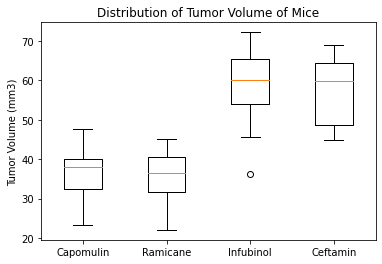

In [15]:
# Generating a box plot of the final tumor volume of each mouse across four regimens of interest
fig, axs = plt.subplots()
axs.set_title("Distribution of Tumor Volume of Mice")
axs.set_ylabel("Tumor Volume (mm3)")
axs.boxplot(list_tumors)
plt.xticks([1,2,3,4],regimens)
plt.show()

## Line and Scatter Plots

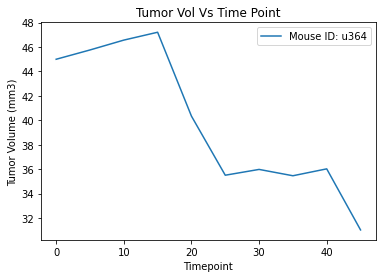

In [16]:
# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_df = research_data_df[research_data_df["Drug Regimen"]=="Capomulin"] \
                                    [["Mouse ID","Timepoint","Tumor Volume (mm3)"]]

# Getting a sample Mouse ID to display on the line chart and setting up x and y axis datasets
sample_mouse = capomulin_df.sample(n=1)["Mouse ID"].iloc[0]
x_axis = capomulin_df[capomulin_df["Mouse ID"]==sample_mouse]["Timepoint"]
y_axis = capomulin_df[capomulin_df["Mouse ID"]==sample_mouse]["Tumor Volume (mm3)"]

# plotting the line chart for sampled mouse id
plt.plot(x_axis, y_axis, label=f"Mouse ID: {sample_mouse}")

# setting up properties of the line chart
plt.title("Tumor Vol Vs Time Point")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.legend()
plt.show()

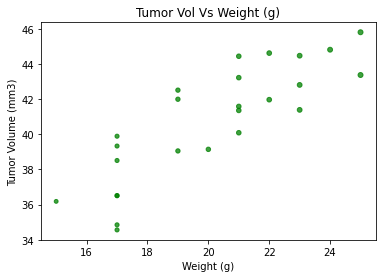

In [17]:
# Generating a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_sc_df = research_data_df[research_data_df["Drug Regimen"]=="Capomulin"] \
                                    .groupby(["Mouse ID","Weight (g)"], as_index=False)["Tumor Volume (mm3)"] \
                                    .mean()

# setting data variables
weight = capomulin_sc_df["Weight (g)"]
tumor = capomulin_sc_df["Tumor Volume (mm3)"]

# plotting the scatter plot
plt.scatter(weight, tumor, marker="o", facecolors="green", 
            s=weight, alpha=0.75)

# setting display properties
plt.title("Tumor Vol Vs Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [18]:
# Calculating the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
correlation_coe = st.pearsonr(weight,tumor)
print(f"The correlation between the Weight and Tumor Volume for the Capomulin \
regimen is {round(correlation_coe[0],2)}")

The correlation between the Weight and Tumor Volume for the Capomulin regimen is 0.84


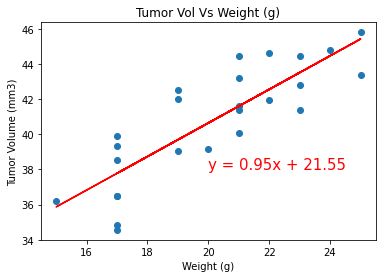

In [19]:
# Computing linear regression model for mouse weight and average tumor volume for the Capomulin regimen
# getting datasets for x and y
x_axis = weight
y_axis = tumor

# performing linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)

# getting regression values and storing in a dataset
regress_values = x_axis * slope + intercept

# creating regression equation in string format for display on the scatter plot
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# plotting scatter plot and linear regression results
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Tumor Vol Vs Weight (g)")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()